### 🐼 Pandas
*"pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language."*

Documentation can be found [here](https://pandas.pydata.org/docs/).

To install Pandas, open the terminal and run the following command:
```bash
pip install pandas
```

The following code snippet shows how to use Pandas, from importing a dataset sample and performing basic operations. The operations shown are used both in the dataset analysis and preprocessing.

```python

### Import pandas and load dataset

In [2]:
# Import pandas library (pd is the conventional alias)
import pandas as pd

# Load a sample dataset from a CSV file (index_col=0 sets the first column as the index)
data = pd.read_csv('sample_dataset.csv', index_col=0)

### Display basic information about the dataset
We can see datasets records by using the `head()` function. We can declare the number of rows to display as an argument. By default, it shows the first 5 rows.

In [3]:
# Show the first 3 rows of the dataset
data.head(3)

,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
Index,,,,,,,,,,,
1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
2,1Ef7b82A4CAAD10,Preston,Lozano,Vega-Gentry,East Jimmychester,Djibouti,5153435776,686-620-1820x944,vmata@colon.com,2021-04-23,http://www.hobbs.com/
3,6F94879bDAfE5a6,Roy,Berry,Murillo-Perry,Isabelborough,Antigua and Barbuda,+1-539-402-0259,(496)978-3969x58947,beckycarr@hogan.com,2020-03-25,http://www.lawrence.com/


We can even display specific column values by accessing the column name.

In [4]:
FIRST_NAME_COL = 'First Name'
LAST_NAME_COL = 'Last Name'

# Show the first 3 rows displaying only the 'First Name' and 'Last Name' columns
data[[FIRST_NAME_COL, LAST_NAME_COL]].head(3)

,First Name,Last Name
Index,,
1,Sheryl,Baxter
2,Preston,Lozano
3,Roy,Berry


### Query the dataset
Pandas allows us to filter and query datasets. We can filter rows based on specific conditions.

To show an example, we can filter the employees with a subscription date after January 1, 2021.

In order to check the date, we need to convert the column to datetime format using `pd.to_datetime()`. Then, we can apply the filter condition and display the results.

In [5]:
SUB_DATE_COL = 'Subscription Date'

# Show the first 3 rows displaying only the 'Subscription Date' column
print("Non filtered dataset:")
print(data[[FIRST_NAME_COL, LAST_NAME_COL, SUB_DATE_COL]].head(3))

# Filter employees with subscription date after January 1, 2021
print("Filtered dataset:")
filtered_data = data[pd.to_datetime(data[SUB_DATE_COL]) > pd.to_datetime('2021-01-01')]
print(filtered_data[[FIRST_NAME_COL, LAST_NAME_COL, SUB_DATE_COL]].head(3))

Non filtered dataset:
      First Name Last Name Subscription Date
Index                                       
1         Sheryl    Baxter        2020-08-24
2        Preston    Lozano        2021-04-23
3            Roy     Berry        2020-03-25
Filtered dataset:
      First Name Last Name Subscription Date
Index                                       
2        Preston    Lozano        2021-04-23
5         Joanna    Bender        2021-04-17
7         Darren      Peck        2021-08-24


### Statistic operations
Pandas provides various statistical functions to analyze datasets. For example, we can calculate the mean, median, standard deviation, and more.

Following example calculates the statistical data mentioned before. The data we want to consider is the length of the first names of employees, not a useful information, but it serves the purpose of demonstrating statistical operations.

In [6]:
# Dataset containing the length of the first names of employees
length_ds = data[FIRST_NAME_COL].str.len()


# Average 
average_length = length_ds.mean()
# Median
median_length = length_ds.median()
# Standard Deviation
std_dev_length = length_ds.std()


print(f"Average Length: {average_length}")
print(f"Median Length: {median_length}")
print(f"Standard Deviation of Length: {std_dev_length}")

data[[FIRST_NAME_COL, LAST_NAME_COL]].assign(**{"First Name Length": length_ds}).head(5)

Average Length: 5.89
Median Length: 6.0
Standard Deviation of Length: 1.434742084308134


,First Name,Last Name,First Name Length
Index,,,
1,Sheryl,Baxter,6
2,Preston,Lozano,7
3,Roy,Berry,3
4,Linda,Olsen,5
5,Joanna,Bender,6


### Row removal
Pandas also allows us to remove rows based on specific conditions.

The operation to do it is `drop()`, variant exists, like `drop_duplicates()` and `dropna()`.

Based on the previous example, we can remove employees with a subscription date before January 1, 2021.

In [7]:
# Show the dataset size before removal
print(f"Dataset size before removal: {data.shape}")

# Remove employees with subscription date before January 1, 2021
cleaned_data = data.drop(data[pd.to_datetime(data[SUB_DATE_COL]) < pd.to_datetime('2021-01-01')].index)
print(cleaned_data[[FIRST_NAME_COL, LAST_NAME_COL, SUB_DATE_COL]].head(3))

# Show the dataset size after removal
print(f"Dataset size after removal: {cleaned_data.shape}")


Dataset size before removal: (100, 11)
      First Name Last Name Subscription Date
Index                                       
2        Preston    Lozano        2021-04-23
5         Joanna    Bender        2021-04-17
7         Darren      Peck        2021-08-24
Dataset size after removal: (62, 11)


The next step will show how to visualize data through **graphs** and **plots**. For that, we will use the `Matplotlib` library.

### 📊 Matplotlib
*"Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible."*

Documentation can be found [here](https://matplotlib.org/stable/contents.html).

To install Matplotlib, open the terminal and run the following command:
```bash
pip install matplotlib
```

### Display a simple plot
We want to visualize the number of employees subscribed per year. We can use an **histogram** to represent this data.

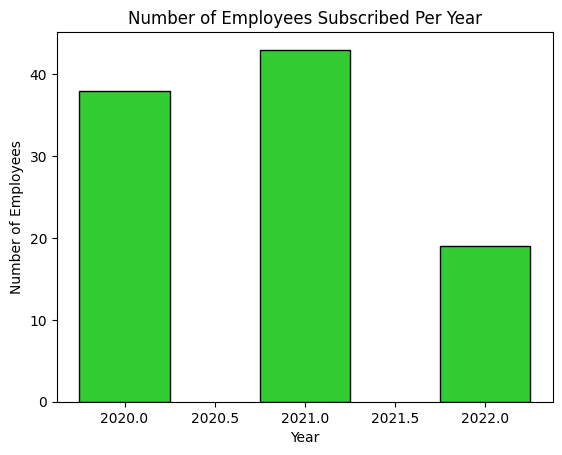

In [8]:
import matplotlib.pyplot as plt

# Label declaration
plt.title('Number of Employees Subscribed Per Year') # Title of the plot
plt.xlabel('Year') # x axis label
plt.ylabel('Number of Employees') # y axis label

# How many bins we want in the histogram
bins = range(2020, 2024)

# We can color the bars of the histogram
color = 'limegreen'
border_color = 'black'

# Width of each bin
bin_width = 0.5

# We create the histogram of the filtered dataset
plt.hist(pd.to_datetime(data[SUB_DATE_COL]).dt.year, 
         bins=bins, 
         align='left', 
         rwidth=bin_width, 
         color=color, 
         edgecolor=border_color)

plt.show()

Of course, we can even use different types of plots, based on the data we want to visualize and the type of representation we want to achieve.

The library provides different types of plots (Pairwise, Gridded, 3D...), for our purpose, we will focus on **statistical plots**.

 Here are some example, we will the previous dataset related to employees first names length.

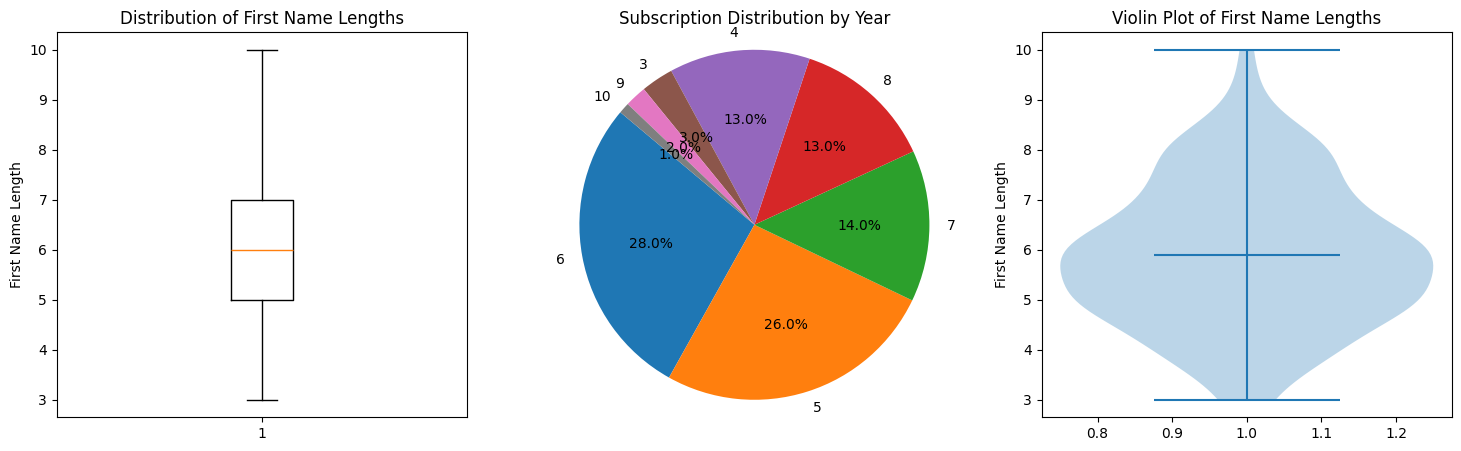

In [20]:
import matplotlib.pyplot as plt

# Reference to the dataset related to employees first names length
length_ds = data[FIRST_NAME_COL].str.len()

fig, axes = plt.subplots(1, 3, figsize=(18, 5)) 

# BARPLOT
axes[0].boxplot(length_ds, vert=True, patch_artist=False) # vert=True for vertical boxplot, patch_artist=True for filled box
axes[0].set_ylabel('First Name Length')
axes[0].set_title('Distribution of First Name Lengths')
 
# PIECHART
axes[1].pie(length_ds.value_counts(), 
        labels=length_ds.value_counts().index,  # type: ignore
        autopct='%1.1f%%', 
        startangle=140)
axes[1].set_title('Subscription Distribution by Year')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#VIOLIN PLOT
axes[2].violinplot(length_ds, vert=True, showmeans=True)
axes[2].set_ylabel('First Name Length')
axes[2].set_title('Violin Plot of First Name Lengths')

plt.show()




With these graphs, we an affirm that major of emplyees have first names with 6 characters.